# Song Genre Classification
# Daniel Weatherspoon

In this project, I will be using two datasets, each their own music genre, being Rock and Hip-Hop. The goal is to train a classifier to be able to tell the two genres apart. This will consist of subsetting data, aggregating the information. There will be machine learning algorithms as well.

In [95]:
#Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

### 1. Preparing Data
Using both a csv file and json file.

In [96]:
tracks = pd.read_csv('rockvhiphop.csv') #track data with genre labels
echo = pd.read_json('echonest-metrics.json', precise_float = True) #track metrics with features
tracks.head(7)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
5,154,256000,0,Arc and Sender,2008-11-26 01:45:04,2008-11-26 00:00:00,319,1,Rock,[26],...,NaN,242,en,Attribution-NonCommercial-NoDerivatives (aka M...,205,NaN,4,NaN,[],Squares And Circles
6,155,192000,0,NaN,2008-11-26 01:45:10,2008-11-26 00:00:00,756,1,Rock,[26],...,NaN,268,en,Attribution-NonCommercial-NoDerivatives (aka M...,197,NaN,0,NaN,[],Maps of the Stars Homes


In [97]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [98]:
echo.head(7)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
5,139,0.106550,0.260911,0.607067,0.835087,0.223676,0.030569,196.961,0.160267
6,140,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991


In [99]:
echo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [100]:
#Need to merge track_id and genre
echo_tracks = pd.merge(left = tracks[['track_id', 'genre_top']], right=echo, on='track_id')
echo_tracks.head(7)

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548
5,171,Rock,0.698278,0.285816,0.213494,0.955691,0.087036,0.064094,125.645,0.150599
6,172,Rock,0.815549,0.144125,0.892721,0.900430,0.104703,0.102294,138.680,0.034916


In [101]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


### 2. Relationships between variables

In [102]:
# Using a correlation matrix to find relationships
echo_tracks_encoded = pd.get_dummies(echo_tracks, columns=['genre_top'])

corr_metrics = echo_tracks_encoded.corr()
corr_metrics.style.background_gradient(cmap='coolwarm')

# A weak correlation between danceability and valence, but not enough. The last two columns are there for error prevention.

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top_Hip-Hop,genre_top_Rock
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070,0.004624,-0.004624
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841,-0.097748,0.097748
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165,0.484457,-0.484457
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603,-0.124860,0.124860
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967,-0.326037,0.326037
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093,0.007070,-0.007070
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894,0.496495,-0.496495
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221,-0.114571,0.114571
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000,0.246701,-0.246701
genre_top_Hip-Hop,0.004624,-0.097748,0.484457,-0.124860,-0.326037,0.007070,0.496495,-0.114571,0.246701,1.000000,-1.000000


## 3. Splitting & Training Data
A crucial step in machine learning.

In [103]:
#Define features
features = echo_tracks.drop(['track_id', 'genre_top'], axis=1)

#Define labels
labels = echo_tracks['genre_top'].values

#Split the data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

## 4. Normalizing
Since I didn't find any strong correlations between our features, it would be best to simplify our models. To do this, I'm going to use Principle Component Analysis or PCA. Before I do PCA, it is crucial to normalize the data because PCA uses absolute variance of a feature rotate the data.

In [104]:
scaler = StandardScaler()

#Fit the scaler with the training data and scale the training data
scaled_train = scaler.fit_transform(train_features)
scaled_test = scaler.transform(test_features)

## 5. Principle Component Analysis 
The data has now been preprocessed, and ready for PCA. For this I will use a scree-plot to display the number of components against the variance explained by each component. A steep drop off from one data point to the next in the plot will help decide the best cutoff.

Text(0.5, 0, 'Principal Component #')

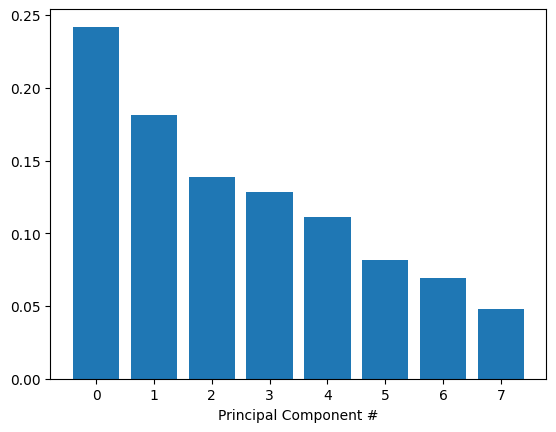

In [105]:
# Getting explained variance ratio from PCA
pca = PCA()
pca.fit(scaled_train)
exp_variance = pca.explained_variance_ratio_

#Plotting the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

## 6. More PCA
There was not a clear drop off in the plot above, so I don't know where to cutoff of Principle Components.

Because of this, I will try looking at a cumulative explained variance plot for determining how many features I need to explain about 80% of the varaiance. Once determined, I can perform PCA with that many components, which will reduce the dimensionality of the data.

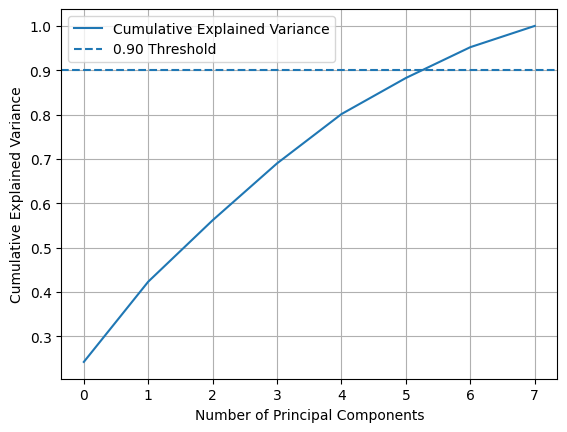

In [107]:
# Calculating the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plotting the cumulative explained variance and with a dashed line at 0.90
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.90, linestyle='--')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance')
ax.legend(['Cumulative Explained Variance', '0.90 Threshold'])
ax.grid()

## 7. Projecting 
From the plot, I can see that 7 features can explain 90% of the variance. So I will use 7 components to perform PCA, reducing dimensionality of train and test features.

In [108]:
# PCA with 7 components and project data onto components
pca = PCA(n_components = 7, random_state = 10)

#Fit the PCA instance and transform the scaled data
train_pca = pca.fit_transform(scaled_train)
test_pca = pca.fit_transform(scaled_test)

## 8. Training the model
The model I will be choosing is a **Decision Tree**, it uses a tree structure of binary decisions to classify a data point into one of two or more categories. 

It is crucial to compare the model to others, just in case other models are better than the one I chose. In this case, I'll choose a simple model, **Logistic Regression**. 

Just because I always like to test 3 models, I'm going to test with the **Naive Bayes** model as well.

In [109]:
# DECISION TREE MODEL
# Creating model 
tree = DecisionTreeClassifier(random_state=10)

# Training model
tree.fit(train_pca, train_labels)

# Predicting the labels
pred_tree_labels = tree.predict(test_pca)

# LOGISTIC REGRESSION MODEL
# Creating model
logreg = LogisticRegression(random_state=10)

# Training model
logreg.fit(train_pca, train_labels) #Using PCA features, because there were too many iterations with the original features

# Predicting the labels
pred_logreg_labels = logreg.predict(test_pca)

# NAIVE BAYES MODEL
# Creating model
nb = GaussianNB()

# Training model
nb.fit(train_features, train_labels) #Using the original features

# Predicting the labels
pred_nb_labels = nb.predict(test_features) #Using the original features

In [110]:
# Comparing the models with classification report
print('Decision Tree:')
print(classification_report(test_labels, pred_tree_labels))

print('Logistic Regression:')
print(classification_report(test_labels, pred_logreg_labels)) 

print('Naive Bayes:')
print(classification_report(test_labels, pred_nb_labels))

Decision Tree:
              precision    recall  f1-score   support

     Hip-Hop       0.50      0.52      0.51       229
        Rock       0.89      0.88      0.88       972

    accuracy                           0.81      1201
   macro avg       0.69      0.70      0.70      1201
weighted avg       0.81      0.81      0.81      1201

Logistic Regression:
              precision    recall  f1-score   support

     Hip-Hop       0.76      0.56      0.64       229
        Rock       0.90      0.96      0.93       972

    accuracy                           0.88      1201
   macro avg       0.83      0.76      0.79      1201
weighted avg       0.87      0.88      0.87      1201

Naive Bayes:
              precision    recall  f1-score   support

     Hip-Hop       0.75      0.65      0.69       229
        Rock       0.92      0.95      0.93       972

    accuracy                           0.89      1201
   macro avg       0.83      0.80      0.81      1201
weighted avg       0.89  

Decision Tree:
[[120 109]
 [120 852]]
Logistic Regression:
[[128 101]
 [ 41 931]]
Naive Bayes:
[[148  81]
 [ 50 922]]


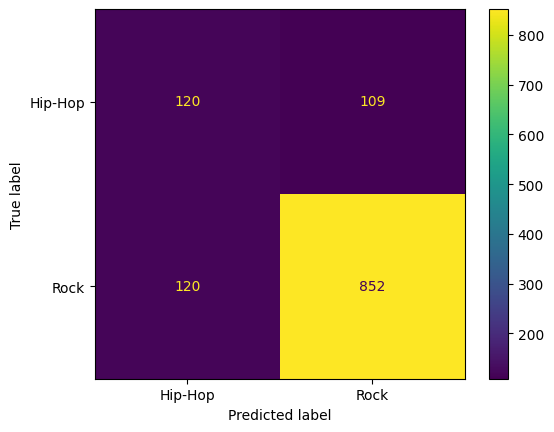

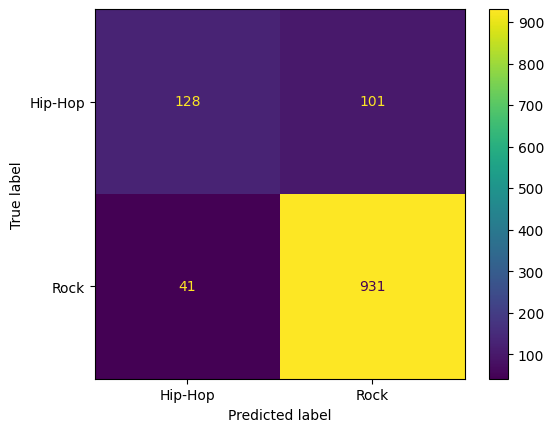

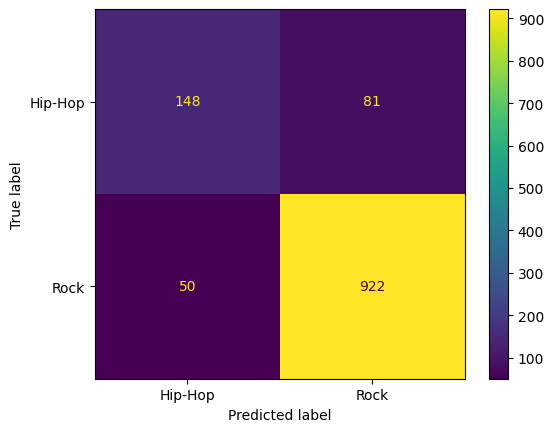

In [111]:
# Confusion matrix for Decision Tree
print('Decision Tree:')
print(confusion_matrix(test_labels, pred_tree_labels))
cm_tree = confusion_matrix(test_labels, pred_tree_labels, labels=['Hip-Hop', 'Rock'])
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['Hip-Hop', 'Rock'])
disp_tree.plot()

# Confusion matrix for Logistic Regression
print('Logistic Regression:')
print(confusion_matrix(test_labels, pred_logreg_labels))
cm_logreg = confusion_matrix(test_labels, pred_logreg_labels, labels=['Hip-Hop', 'Rock'])
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Hip-Hop', 'Rock'])
disp_logreg.plot()

# Confusion matrix for Naive Bayes
print('Naive Bayes:')
print(confusion_matrix(test_labels, pred_nb_labels))
cm_nb = confusion_matrix(test_labels, pred_nb_labels, labels=['Hip-Hop', 'Rock'])
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Hip-Hop', 'Rock'])
disp_nb.plot()

## 10. Balance data for better results
I noticed that the rock songs are actually getting classified pretty well. The hip-hop songs however, are doing pretty poor, and getting misclassified as rock songs. This might be caused by how the rock songs outnumber hip-hop songs drastically. What this also tells me is that the models are getting better accuracy solely because they *can* classify rock songs. That's just no good. 

In [112]:
hiphop = echo_tracks.drop(echo_tracks[echo_tracks["genre_top"] != "Hip-Hop"].index, inplace = None)
rock = echo_tracks.drop(echo_tracks[echo_tracks["genre_top"] != "Rock"].index, inplace = None)

# make rock songs to be same number as there are hip-hop songs
rock = rock.sample(hiphop.shape[0], random_state=10)

# merge the dataframes
hiprock = pd.concat([rock, hiphop])

# make features, labels, and pca projections
features = hiprock.drop(['track_id', 'genre_top'], axis=1)
labels = hiprock['genre_top']

# split the data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.fit_transform(scaler.transform(test_features))

## 11. Checking for improvements

In [113]:
# DECISION TREE MODEL
# Creating model 
tree = DecisionTreeClassifier(random_state=10)

# Training model
tree.fit(train_pca, train_labels)

# Predicting the labels
pred_tree_labels = tree.predict(test_pca)

# LOGISTIC REGRESSION MODEL
# Creating model
logreg = LogisticRegression(random_state=10)

# Training model
logreg.fit(train_pca, train_labels) #Using PCA features, because there were too many iterations with the original features

# Predicting the labels
pred_logreg_labels = logreg.predict(test_pca)

# NAIVE BAYES MODEL
# Creating model
nb = GaussianNB()

# Training model
nb.fit(train_features, train_labels) #Using the original features

# Predicting the labels
pred_nb_labels = nb.predict(test_features) #Using the original features

In [114]:
# Comparing the models with classification report
print('Decision Tree:')
print(classification_report(test_labels, pred_tree_labels))

print('Logistic Regression:')
print(classification_report(test_labels, pred_logreg_labels)) 

print('Naive Bayes:')
print(classification_report(test_labels, pred_nb_labels))

Decision Tree:
              precision    recall  f1-score   support

     Hip-Hop       0.81      0.77      0.79       230
        Rock       0.78      0.81      0.79       225

    accuracy                           0.79       455
   macro avg       0.79      0.79      0.79       455
weighted avg       0.79      0.79      0.79       455

Logistic Regression:
              precision    recall  f1-score   support

     Hip-Hop       0.87      0.80      0.84       230
        Rock       0.81      0.88      0.84       225

    accuracy                           0.84       455
   macro avg       0.84      0.84      0.84       455
weighted avg       0.84      0.84      0.84       455

Naive Bayes:
              precision    recall  f1-score   support

     Hip-Hop       0.87      0.79      0.83       230
        Rock       0.80      0.88      0.84       225

    accuracy                           0.84       455
   macro avg       0.84      0.84      0.83       455
weighted avg       0.84  

Decision Tree:
[[177  53]
 [ 42 183]]
Logistic Regression:
[[185  45]
 [ 28 197]]
Naive Bayes:
[[181  49]
 [ 26 199]]


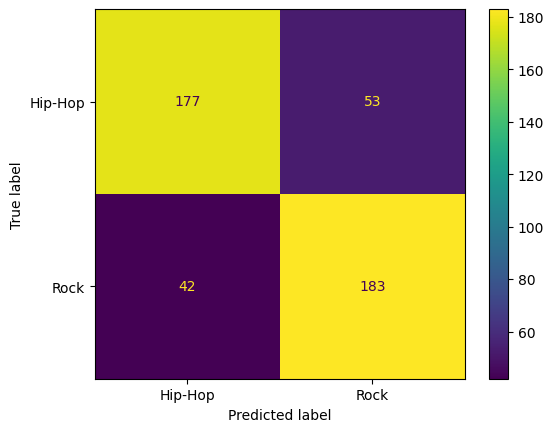

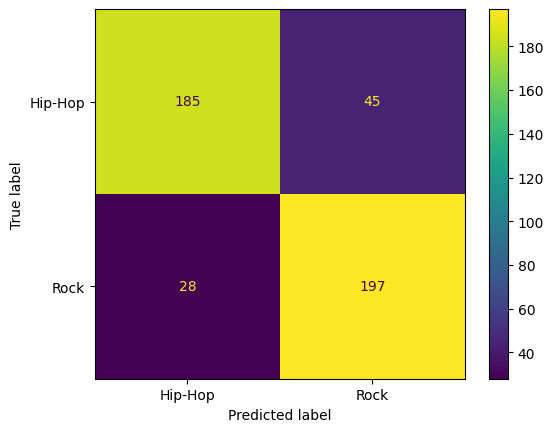

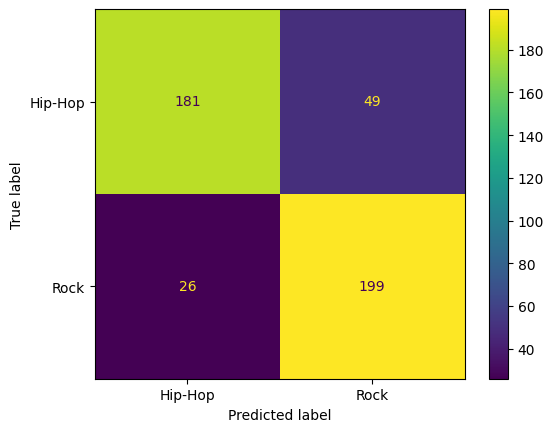

In [115]:
print('Decision Tree:')
print(confusion_matrix(test_labels, pred_tree_labels))
cm_tree = confusion_matrix(test_labels, pred_tree_labels, labels=['Hip-Hop', 'Rock'])
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['Hip-Hop', 'Rock'])
disp_tree.plot()

# Confusion matrix for Logistic Regression
print('Logistic Regression:')
print(confusion_matrix(test_labels, pred_logreg_labels))
cm_logreg = confusion_matrix(test_labels, pred_logreg_labels, labels=['Hip-Hop', 'Rock'])
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Hip-Hop', 'Rock'])
disp_logreg.plot()

# Confusion matrix for Naive Bayes
print('Naive Bayes:')
print(confusion_matrix(test_labels, pred_nb_labels))
cm_nb = confusion_matrix(test_labels, pred_nb_labels, labels=['Hip-Hop', 'Rock'])
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Hip-Hop', 'Rock'])
disp_nb.plot()

## 12. Cross-validate to evaluate models
After balancing the data, I see that a lot of the bias is now gone! Now I want another way to see how well the models are performing, so I'll apply cross-validation. 

Before doing that, I need to create pipelines to scale the data, perform PCA, and instantiate the models. 

Cross-validation will split the data multiple ways and test the model with different splits. 

In [116]:
#pipelines 
tree_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=7)), ('tree', DecisionTreeClassifier(random_state=10))])
logreg_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=7)), ('logreg', LogisticRegression(random_state=10))])
nb_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=7)), ('nb', GaussianNB())])

#K-Fold Cross Validation
kf = KFold(10)

#Train models with K-Fold Cross Validation
tree_scores = cross_val_score(tree_pipe, features, labels, cv=kf)
logreg_scores = cross_val_score(logreg_pipe, features, labels, cv=kf)
nb_scores = cross_val_score(nb_pipe, features, labels, cv=kf)

#Print the mean of the scores
print('Decision Tree:', np.mean(tree_scores))
print('Logistic Regression:', np.mean(logreg_scores))
print('Naive Bayes:', np.mean(nb_scores))


Decision Tree: 0.7879120879120878
Logistic Regression: 0.8318681318681319
Naive Bayes: 0.7983516483516483


## Results
It appears that simpler is better in this case! As the most simple model, **Logistic Regression**, gives me the best scores! 
The Naive Bayes model has the highest accuracy, but the Decision Tree model is the most balanced. The Logistic Regression model is the least accurate, but it is consistent.
